In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

england_matches = pd.read_json('new_data/matches/matches_England.json')
teams = pd.read_json('new_data/teams.json')
england_events = pd.read_json('new_data/events/events_England.json')
players = pd.read_json('new_data/players.json')

In [2]:
players[players['wyId']==7868]

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
3017,"{'name': 'England', 'id': 0, 'alpha3code': 'XE...",1993-08-15,null,1612,Alex,right,175,Oxlade-Chamberlain,,"{'name': 'Jamaica', 'id': 388, 'alpha3code': '...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",A. Oxlade-Chamberlain,70,7868


In [3]:
england_matches.head()

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,364,2018-05-13 18:00:00,2018-05-13 14:00:00,Regular,38,"Burnley - AFC Bournemouth, 1 - 2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",Turf Moor,1659,2500089
1,364,2018-05-13 18:00:00,2018-05-13 14:00:00,Regular,38,"Crystal Palace - West Bromwich Albion, 2 - 0","[{'refereeId': 381851, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",Selhurst Park,1628,2500090
2,364,2018-05-13 18:00:00,2018-05-13 14:00:00,Regular,38,"Huddersfield Town - Arsenal, 0 - 1","[{'refereeId': 384965, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",The John Smith's Stadium,1609,2500091
3,364,2018-05-13 18:00:00,2018-05-13 14:00:00,Regular,38,"Liverpool - Brighton & Hove Albion, 4 - 0","[{'refereeId': 385704, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",Anfield,1612,2500092
4,364,2018-05-13 18:00:00,2018-05-13 14:00:00,Regular,38,"Manchester United - Watford, 1 - 0","[{'refereeId': 381853, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",Old Trafford,1611,2500093


In [4]:
england_events.head(10)

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609
5,8,Pass,12.548934,177959177,2499719,1H,3319,"[{'y': 88, 'x': 72}, {'y': 75, 'x': 77}]",85,Simple pass,[{'id': 1802}],1609
6,8,Pass,13.961228,177959186,2499719,1H,8653,"[{'y': 25, 'x': 23}, {'y': 15, 'x': 39}]",82,Head pass,[{'id': 1801}],1631
7,1,Duel,14.765321,177959189,2499719,1H,8013,"[{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1631
8,1,Duel,14.765321,177961218,2499719,1H,0,"[{'y': 85, 'x': 61}, {'y': 80, 'x': 67}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1609
9,8,Pass,15.320341,177959178,2499719,1H,167145,"[{'y': 80, 'x': 67}, {'y': 61, 'x': 59}]",82,Head pass,"[{'id': 1401}, {'id': 1801}]",1609


In [5]:
class team:
    def __init__(self, name:str):
        self.name = name
        self.team_id = self.get_team_id()
        self.matches = self.get_matches()
        self.players = self.get_players()
        self.all_events = self.get_all_events()
    
    def get_team_id(self):
        return int(teams[teams['name'] == self.name]['wyId'])
        
    def get_matches(self, opposition_team=None):
        matches = pd.DataFrame(columns=england_matches.columns)
        specific_matches = pd.DataFrame(columns=england_matches.columns)
        
        for index,row in england_matches.iterrows():
            teams_in_match = [int(team) for team in list(row['teamsData'].keys())]
            if opposition_team is None:
                if self.team_id in teams_in_match:
                    matches = matches.append(row)
            else:
                if self.team_id in teams_in_match and opposition_team.team_id in teams_in_match:
                    specific_matches = specific_matches.append(row)
                
        if opposition_team is None:     
            return matches
        else:
            return specific_matches
    
    def get_players(self):
        return players[players['currentTeamId'] == self.team_id]
    
    def get_all_events(self):
        return england_events[england_events['teamId'] == self.team_id]
    
    def get_player_name(self, graph_id):
        return players[players['wyId']==graph_id]['lastName']

In [6]:
# get_player_name(team('Arsenal'), 3319)
ars = team('Arsenal').get_players()
ars = ars[ars['wyId']==333571]
ars.iloc[0]['shortName']

'L. Torreira'

In [7]:
team('Arsenal').get_all_events()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609
5,8,Pass,12.548934,177959177,2499719,1H,3319,"[{'y': 88, 'x': 72}, {'y': 75, 'x': 77}]",85,Simple pass,[{'id': 1802}],1609
8,1,Duel,14.765321,177961218,2499719,1H,0,"[{'y': 85, 'x': 61}, {'y': 80, 'x': 67}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1609
9,8,Pass,15.320341,177959178,2499719,1H,167145,"[{'y': 80, 'x': 67}, {'y': 61, 'x': 59}]",82,Head pass,"[{'id': 1401}, {'id': 1801}]",1609
10,8,Pass,18.051875,177959179,2499719,1H,49876,"[{'y': 61, 'x': 59}, {'y': 45, 'x': 45}]",82,Head pass,[{'id': 1801}],1609
11,8,Pass,20.426527,177959180,2499719,1H,14869,"[{'y': 45, 'x': 45}, {'y': 54, 'x': 71}]",83,High pass,[{'id': 1801}],1609


In [8]:
team('Arsenal').get_players()

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
52,"{'name': 'Nigeria', 'id': '566', 'alpha3code':...",1996-05-03,16823,1609,Alex,right,180,Iwobi,,"{'name': 'England', 'id': '0', 'alpha3code': '...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",A. Iwobi,75,230020
182,"{'name': 'Germany', 'id': '276', 'alpha3code':...",1988-10-15,3148,1609,Mesut,left,180,\u00d6zil,,"{'name': 'Germany', 'id': '276', 'alpha3code':...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",M. \u00d6zil,76,3319
549,"{'name': 'Uruguay', 'id': '858', 'alpha3code':...",1996-02-11,15670,1609,Lucas,right,168,Torreira Di Pascua,,"{'name': 'Spain', 'id': '724', 'alpha3code': '...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",L. Torreira,64,333571
681,"{'name': 'England', 'id': '0', 'alpha3code': '...",1990-11-26,2413,1609,Daniel Nii,right,185,Tackie Mensah Welbeck,,"{'name': 'Ghana', 'id': '288', 'alpha3code': '...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",D. Welbeck,73,7945
1280,"{'name': 'Switzerland', 'id': '756', 'alpha3co...",1992-09-27,6697,1609,Granit,left,185,Xhaka,,"{'name': 'Albania', 'id': '8', 'alpha3code': '...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",G. Xhaka,82,49876
1494,"{'name': 'Switzerland', 'id': '756', 'alpha3co...",1984-01-16,6697,1609,Stephan,right,182,Lichtsteiner,,"{'name': 'Switzerland', 'id': '756', 'alpha3co...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",S. Lichtsteiner,75,20465
1663,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",1986-02-26,1598,1609,Ignacio,left,179,Monreal Eraso,,"{'name': 'Spain', 'id': '724', 'alpha3code': '...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",Nacho Monreal,72,3560
1717,"{'name': 'Egypt', 'id': '818', 'alpha3code': '...",1992-07-11,16129,1609,Mohamed Naser,right,180,Elsayed Elneny,,"{'name': 'Egypt', 'id': '818', 'alpha3code': '...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",Mohamed Elneny,70,120339
2364,"{'name': 'Wales', 'id': 0, 'alpha3code': 'XWA'...",1990-12-26,10682,1609,Aaron,right,183,Ramsey,,"{'name': 'Wales', 'id': 0, 'alpha3code': 'XWA'...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",A. Ramsey,76,7870
2833,"{'name': 'Czech Republic', 'id': 203, 'alpha3c...",1982-05-20,null,1609,Petr,left,196,\u010cech,,"{'name': 'Czech Republic', 'id': 203, 'alpha3c...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",P. \u010cech,90,7882


In [9]:
team_1 = team('Arsenal')
team_2 = team('Leicester City')
matches = team_1.get_matches(team_2)

In [10]:
matches.head()

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
13,364,2018-05-09 22:45:00,2018-05-09 18:45:00,Regular,31,"Leicester City - Arsenal, 3 - 1","[{'refereeId': 408156, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",King Power Stadium,1631,2500022
379,364,2017-08-11 22:45:00,2017-08-11 18:45:00,Regular,1,"Arsenal - Leicester City, 4 - 3","[{'refereeId': 385909, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",Emirates Stadium,1609,2499719


In [11]:
# print(matches.head())
team_info = matches.loc[379]['teamsData']
team_info
# matches.head()
#1609 - Arsenal

{'1609': {'coachId': 7845,
  'formation': {'bench': [{'goals': '0',
     'ownGoals': '0',
     'playerId': 20612,
     'redCards': '0',
     'yellowCards': '0'},
    {'goals': '0',
     'ownGoals': '0',
     'playerId': 25662,
     'redCards': '0',
     'yellowCards': '0'},
    {'goals': '0',
     'ownGoals': '0',
     'playerId': 7864,
     'redCards': '0',
     'yellowCards': '0'},
    {'goals': '0',
     'ownGoals': '0',
     'playerId': 230020,
     'redCards': '0',
     'yellowCards': '0'},
    {'goals': '1',
     'ownGoals': '0',
     'playerId': 26010,
     'redCards': '0',
     'yellowCards': '0'},
    {'goals': '0',
     'ownGoals': '0',
     'playerId': 7879,
     'redCards': '0',
     'yellowCards': '0'},
    {'goals': '1',
     'ownGoals': '0',
     'playerId': 7870,
     'redCards': '0',
     'yellowCards': '0'}],
   'lineup': [{'goals': '0',
     'ownGoals': '0',
     'playerId': 370224,
     'redCards': '0',
     'yellowCards': '0'},
    {'goals': '0',
     'ownGoals': '

In [12]:
first_11 = team_info['1609']['formation']['lineup']
players_id = []
players_dict = {}
players_dict_ulta = {}
for i in range(len(first_11)):
#     print(first_11[i]['playerId'])
    players_id.append(first_11[i]['playerId'])
    players_dict[first_11[i]['playerId']] = i
    players_dict_ulta[i] = first_11[i]['playerId']

print(players_id)
print(players_dict)
print(players_dict_ulta)

[370224, 120339, 7945, 14869, 25413, 7868, 3560, 167145, 3319, 7882, 49876]
{370224: 0, 120339: 1, 7945: 2, 14869: 3, 25413: 4, 7868: 5, 3560: 6, 167145: 7, 3319: 8, 7882: 9, 49876: 10}
{0: 370224, 1: 120339, 2: 7945, 3: 14869, 4: 25413, 5: 7868, 6: 3560, 7: 167145, 8: 3319, 9: 7882, 10: 49876}


In [13]:
players_names = {}
ars = team('Arsenal').get_players()
for i in range(11):
    pid = players_dict_ulta[i]
#     print(pid)
#     ars_pname = ars[ars['wyId']==pid]
#     print(ars[ars['wyId']==pid])
#     print(ars[ars['wyId']==pid].iloc[0]['shortName'])
#     print(players[players['wyId']==pid].iloc[0]['shortName'])
    players_names[i] = players[players['wyId']==pid].iloc[0]['shortName']
    
players_names

{0: 'R. Holding',
 1: 'Mohamed Elneny',
 2: 'D. Welbeck',
 3: 'S. Kola\\u0161inac',
 4: 'A. Lacazette',
 5: 'A. Oxlade-Chamberlain',
 6: 'Nacho Monreal',
 7: 'Beller\\u00edn',
 8: 'M. \\u00d6zil',
 9: 'P. \\u010cech',
 10: 'G. Xhaka'}

In [14]:
print([{'id':1801}]==[{'id':1801}])

True


In [15]:
#2500022
#2499719
# acc = [{'id':1801}]*541
arsenal_events = team('Arsenal').get_all_events()
arsenal_events = arsenal_events[arsenal_events['matchId']==2499719]
arsenal_pass = arsenal_events[arsenal_events['eventName']=='Pass']
arsenal_pass = arsenal_pass[arsenal_pass['playerId'].isin(players_id)]
arsenal_pass['Length'] = arsenal_pass.tags.apply(lambda x: len(x))
arsenal_pass = arsenal_pass[arsenal_pass['Length']==1]
arsenal_pass['accurate'] = arsenal_pass.apply(lambda row: row['tags'][0]['id'], axis=1)
arsenal_pass = arsenal_pass[arsenal_pass['accurate']==1801]
arsenal_pass = arsenal_pass.reset_index(drop=True)
arsenal_pass
# arsenal_pass.loc[0]

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId,Length,accurate
0,8,Pass,2.758649,177959171,2499719,1H,25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",85,Simple pass,[{'id': 1801}],1609,1,1801
1,8,Pass,4.946850,177959172,2499719,1H,370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",83,High pass,[{'id': 1801}],1609,1,1801
2,8,Pass,6.542188,177959173,2499719,1H,3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",82,Head pass,[{'id': 1801}],1609,1,1801
3,8,Pass,8.143395,177959174,2499719,1H,120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",82,Head pass,[{'id': 1801}],1609,1,1801
4,8,Pass,10.302366,177959175,2499719,1H,167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",85,Simple pass,[{'id': 1801}],1609,1,1801
5,8,Pass,18.051875,177959179,2499719,1H,49876,"[{'y': 61, 'x': 59}, {'y': 45, 'x': 45}]",82,Head pass,[{'id': 1801}],1609,1,1801
6,8,Pass,20.426527,177959180,2499719,1H,14869,"[{'y': 45, 'x': 45}, {'y': 54, 'x': 71}]",83,High pass,[{'id': 1801}],1609,1,1801
7,8,Pass,43.045831,177959185,2499719,1H,3560,"[{'y': 74, 'x': 19}, {'y': 53, 'x': 4}]",85,Simple pass,[{'id': 1801}],1609,1,1801
8,8,Pass,44.425679,177959187,2499719,1H,7882,"[{'y': 53, 'x': 4}, {'y': 44, 'x': 40}]",84,Launch,[{'id': 1801}],1609,1,1801
9,8,Pass,76.625696,177959199,2499719,1H,49876,"[{'y': 31, 'x': 65}, {'y': 13, 'x': 90}]",85,Simple pass,[{'id': 1801}],1609,1,1801


In [16]:
import numpy as np

In [17]:
players_matrix = np.zeros((11, 11), dtype=int)
players_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [18]:
for i in range(1, len(arsenal_pass)):
    #print(arsenal_pass.loc[i, 'eventSec']-arsenal_pass.loc[i-1, 'eventSec'])
    if arsenal_pass.loc[i, 'eventSec']-arsenal_pass.loc[i-1, 'eventSec'] < 5.0:
        #print(arsenal_pass.loc[i, 'eventSec']-arsenal_pass.loc[i-1, 'eventSec'])
        player_from = arsenal_pass.loc[i-1, 'playerId']
        player_to = arsenal_pass.loc[i, 'playerId']
        #print(player_from, player_to)
        print(players_dict[player_from], players_dict[player_to])
        if player_from != player_to:
            players_matrix[players_dict[player_from]][players_dict[player_to]] += 1
            players_matrix[players_dict[player_to]][players_dict[player_from]] += 1
        

4 0
0 8
8 1
1 7
10 3
6 9
5 10
10 7
9 3
3 1
6 1
1 8
6 1
1 0
0 10
10 2
2 10
10 7
7 8
8 1
1 8
8 7
7 8
8 6
10 6
6 0
0 1
1 10
3 1
1 6
6 10
10 7
7 10
10 3
3 5
5 1
1 6
6 5
5 10
10 8
5 10
10 1
1 10
6 3
3 6
6 0
0 7
7 0
0 6
1 7
7 0
0 6
6 3
3 6
6 10
0 8
8 10
1 7
7 0
0 6
6 10
8 10
10 1
1 10
10 0
0 6
6 3
3 8
8 6
6 1
1 6
8 5
5 8
8 3
3 8
8 10
10 0
0 7
7 0
0 6
6 3
8 4
4 3
3 8
8 6
6 0
0 7
7 1
1 7
7 10
10 0
0 6
8 3
3 8
7 1
0 1
1 0
0 6
6 3
3 8
8 3
3 8
8 2
2 3
3 0
0 1
1 10
10 8
3 5
5 3
3 6
6 3
3 6
6 0
0 1
1 10
10 2
3 10
10 8
8 7
7 8
8 4
7 0
0 3
3 1
1 5
5 3
3 6
6 0
0 7
7 10
10 1
1 5
5 1
1 2
3 1
1 10
10 2
2 8
0 1
1 3
3 1
1 10
10 1
1 7
7 8
8 3
3 10
7 1
1 10
6 1
4 10
8 0
0 1
1 3
10 7
6 3
3 5
5 10
10 8
0 9
0 2
7 4
0 6
5 10
10 3
3 5
5 1
7 0
0 9
3 1
1 10
4 1
1 7
7 1
1 7
1 6
8 10
8 10
10 7
5 8
8 10
10 1
1 5
3 5
7 5
6 0
0 6
1 0
0 1
1 10
10 2
2 10
10 6
6 1
8 3
3 10
10 6
6 5
5 10
10 8
8 4
8 0
0 10
10 1
1 6
6 3
3 10
10 3
3 6
1 10
10 8
8 10
10 8
8 3
3 6
6 10
10 7
7 8
8 4
4 8
8 8
8 6
6 3
3 5
5 4
4 8
8 7
10 3
3 1
1 0
0 

In [19]:
players_matrix

array([[ 0, 16,  1,  3,  1,  1, 17, 15,  8,  3,  8],
       [16,  0,  3,  9,  2,  6, 12, 18,  4,  1, 22],
       [ 1,  3,  0,  1,  0,  3,  0,  0,  2,  0,  6],
       [ 3,  9,  1,  0,  1,  8, 20,  5, 17,  1, 12],
       [ 1,  2,  0,  1,  0,  1,  0,  2,  7,  0,  4],
       [ 1,  6,  3,  8,  1,  0,  6,  1,  4,  1, 10],
       [17, 12,  0, 20,  0,  6,  0,  0,  5,  3, 10],
       [15, 18,  0,  5,  2,  1,  0,  0, 14,  1,  9],
       [ 8,  4,  2, 17,  7,  4,  5, 14,  0,  2, 24],
       [ 3,  1,  0,  1,  0,  1,  3,  1,  2,  0,  0],
       [ 8, 22,  6, 12,  4, 10, 10,  9, 24,  0,  0]])

In [20]:
import networkx as nx
% matplotlib inline

In [21]:
G = nx.from_numpy_matrix(players_matrix)

In [22]:
G = nx.relabel_nodes(G, players_names)
# sorted(G)
G.nodes()

NodeView(('R. Holding', 'Mohamed Elneny', 'D. Welbeck', 'S. Kola\\u0161inac', 'A. Lacazette', 'A. Oxlade-Chamberlain', 'Nacho Monreal', 'Beller\\u00edn', 'M. \\u00d6zil', 'P. \\u010cech', 'G. Xhaka'))

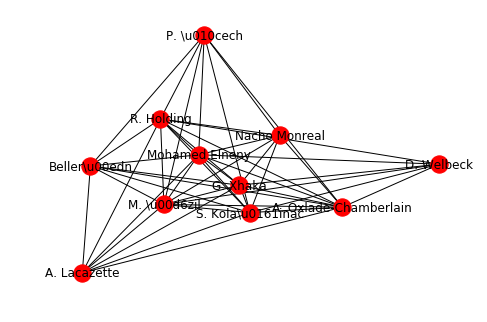

In [23]:
nx.draw(G, with_labels=True)

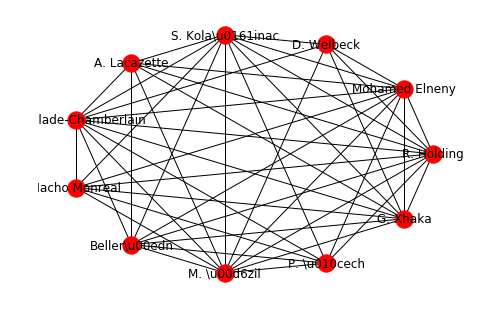

In [24]:
nx.drawing.nx_pylab.draw_circular(G, with_labels=True)

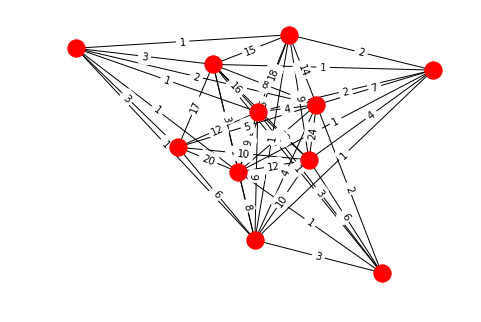

In [25]:
# G = nx.from_numpy_matrix(players_matrix)
layout = nx.spring_layout(G)
nx.draw(G, layout)
# nx.draw_networkx_edge_labels(G, pos=layout)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels, with_labels=True)
plt.show()

In [26]:
# nx.write_gexf(G, "test.gexf")

In [27]:
G.nodes()

NodeView(('R. Holding', 'Mohamed Elneny', 'D. Welbeck', 'S. Kola\\u0161inac', 'A. Lacazette', 'A. Oxlade-Chamberlain', 'Nacho Monreal', 'Beller\\u00edn', 'M. \\u00d6zil', 'P. \\u010cech', 'G. Xhaka'))

In [28]:
list(G.nodes(data=True))

[('R. Holding', {}),
 ('Mohamed Elneny', {}),
 ('D. Welbeck', {}),
 ('S. Kola\\u0161inac', {}),
 ('A. Lacazette', {}),
 ('A. Oxlade-Chamberlain', {}),
 ('Nacho Monreal', {}),
 ('Beller\\u00edn', {}),
 ('M. \\u00d6zil', {}),
 ('P. \\u010cech', {}),
 ('G. Xhaka', {})]

In [29]:
list(G.edges(data=True))

[('R. Holding', 'Mohamed Elneny', {'weight': 16}),
 ('R. Holding', 'D. Welbeck', {'weight': 1}),
 ('R. Holding', 'S. Kola\\u0161inac', {'weight': 3}),
 ('R. Holding', 'A. Lacazette', {'weight': 1}),
 ('R. Holding', 'A. Oxlade-Chamberlain', {'weight': 1}),
 ('R. Holding', 'Nacho Monreal', {'weight': 17}),
 ('R. Holding', 'Beller\\u00edn', {'weight': 15}),
 ('R. Holding', 'M. \\u00d6zil', {'weight': 8}),
 ('R. Holding', 'P. \\u010cech', {'weight': 3}),
 ('R. Holding', 'G. Xhaka', {'weight': 8}),
 ('Mohamed Elneny', 'D. Welbeck', {'weight': 3}),
 ('Mohamed Elneny', 'S. Kola\\u0161inac', {'weight': 9}),
 ('Mohamed Elneny', 'A. Lacazette', {'weight': 2}),
 ('Mohamed Elneny', 'A. Oxlade-Chamberlain', {'weight': 6}),
 ('Mohamed Elneny', 'Nacho Monreal', {'weight': 12}),
 ('Mohamed Elneny', 'Beller\\u00edn', {'weight': 18}),
 ('Mohamed Elneny', 'M. \\u00d6zil', {'weight': 4}),
 ('Mohamed Elneny', 'P. \\u010cech', {'weight': 1}),
 ('Mohamed Elneny', 'G. Xhaka', {'weight': 22}),
 ('D. Welbeck', 

In [34]:
cent = nx.algorithms.centrality.betweenness_centrality(G, weight='weight')
cent

{'A. Lacazette': 0.22148148148148153,
 'A. Oxlade-Chamberlain': 0.16555555555555554,
 'Beller\\u00edn': 0.0,
 'D. Welbeck': 0.06888888888888889,
 'G. Xhaka': 0.0,
 'M. \\u00d6zil': 0.0,
 'Mohamed Elneny': 0.0,
 'Nacho Monreal': 0.0,
 'P. \\u010cech': 0.42,
 'R. Holding': 0.06185185185185185,
 'S. Kola\\u0161inac': 0.1496296296296296}

In [36]:
nx.set_node_attributes(G, cent, 'betweenness')

In [37]:
G.nodes(data=True)

NodeDataView({'R. Holding': {'betweenness': 0.06185185185185185}, 'Mohamed Elneny': {'betweenness': 0.0}, 'D. Welbeck': {'betweenness': 0.06888888888888889}, 'S. Kola\\u0161inac': {'betweenness': 0.1496296296296296}, 'A. Lacazette': {'betweenness': 0.22148148148148153}, 'A. Oxlade-Chamberlain': {'betweenness': 0.16555555555555554}, 'Nacho Monreal': {'betweenness': 0.0}, 'Beller\\u00edn': {'betweenness': 0.0}, 'M. \\u00d6zil': {'betweenness': 0.0}, 'P. \\u010cech': {'betweenness': 0.42}, 'G. Xhaka': {'betweenness': 0.0}})

In [38]:
nx.algorithms.node_connectivity(G)

6

In [43]:
conn = nx.algorithms.all_pairs_node_connectivity(G)
conn

{'A. Lacazette': {'A. Oxlade-Chamberlain': 7,
  'Beller\\u00edn': 7,
  'D. Welbeck': 6,
  'G. Xhaka': 7,
  'M. \\u00d6zil': 7,
  'Mohamed Elneny': 7,
  'Nacho Monreal': 7,
  'P. \\u010cech': 7,
  'R. Holding': 7,
  'S. Kola\\u0161inac': 7},
 'A. Oxlade-Chamberlain': {'A. Lacazette': 7,
  'Beller\\u00edn': 8,
  'D. Welbeck': 6,
  'G. Xhaka': 9,
  'M. \\u00d6zil': 10,
  'Mohamed Elneny': 10,
  'Nacho Monreal': 7,
  'P. \\u010cech': 7,
  'R. Holding': 10,
  'S. Kola\\u0161inac': 10},
 'Beller\\u00edn': {'A. Lacazette': 7,
  'A. Oxlade-Chamberlain': 8,
  'D. Welbeck': 6,
  'G. Xhaka': 8,
  'M. \\u00d6zil': 8,
  'Mohamed Elneny': 8,
  'Nacho Monreal': 7,
  'P. \\u010cech': 7,
  'R. Holding': 8,
  'S. Kola\\u0161inac': 8},
 'D. Welbeck': {'A. Lacazette': 6,
  'A. Oxlade-Chamberlain': 6,
  'Beller\\u00edn': 6,
  'G. Xhaka': 6,
  'M. \\u00d6zil': 6,
  'Mohamed Elneny': 6,
  'Nacho Monreal': 6,
  'P. \\u010cech': 6,
  'R. Holding': 6,
  'S. Kola\\u0161inac': 6},
 'G. Xhaka': {'A. Lacazette': 7,

In [44]:
nx.set_node_attributes(G, conn, 'Connectivity')

In [50]:
clus = nx.clustering(G, weight='weight')
clus

{'A. Lacazette': 0.14558936783070614,
 'A. Oxlade-Chamberlain': 0.14897254468727467,
 'Beller\\u00edn': 0.24385604964014343,
 'D. Welbeck': 0.15305376323269132,
 'G. Xhaka': 0.32006484012449543,
 'M. \\u00d6zil': 0.23116877379769724,
 'Mohamed Elneny': 0.24150943683072673,
 'Nacho Monreal': 0.33222544129671794,
 'P. \\u010cech': 0.10743071752096495,
 'R. Holding': 0.19880415788890574,
 'S. Kola\\u0161inac': 0.21401261626539625}

In [51]:
nx.set_node_attributes(G, clus, 'Cluster')

In [52]:
from networkx.readwrite import json_graph;

In [53]:
arsenal_json = json_graph.node_link_data(G)
arsenal_json

{'directed': False,
 'graph': {},
 'links': [{'source': 'R. Holding', 'target': 'Mohamed Elneny', 'weight': 16},
  {'source': 'R. Holding', 'target': 'D. Welbeck', 'weight': 1},
  {'source': 'R. Holding', 'target': 'S. Kola\\u0161inac', 'weight': 3},
  {'source': 'R. Holding', 'target': 'A. Lacazette', 'weight': 1},
  {'source': 'R. Holding', 'target': 'A. Oxlade-Chamberlain', 'weight': 1},
  {'source': 'R. Holding', 'target': 'Nacho Monreal', 'weight': 17},
  {'source': 'R. Holding', 'target': 'Beller\\u00edn', 'weight': 15},
  {'source': 'R. Holding', 'target': 'M. \\u00d6zil', 'weight': 8},
  {'source': 'R. Holding', 'target': 'P. \\u010cech', 'weight': 3},
  {'source': 'R. Holding', 'target': 'G. Xhaka', 'weight': 8},
  {'source': 'Mohamed Elneny', 'target': 'D. Welbeck', 'weight': 3},
  {'source': 'Mohamed Elneny', 'target': 'S. Kola\\u0161inac', 'weight': 9},
  {'source': 'Mohamed Elneny', 'target': 'A. Lacazette', 'weight': 2},
  {'source': 'Mohamed Elneny', 'target': 'A. Oxlade

In [54]:
import json

with open("sample_weight_clus.json", "w") as outfile: 
    json.dump(arsenal_json, outfile) 